In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

from sklearn import metrics

In [2]:
mobile  = pd.read_csv('Flipkart Mobile - 2.csv')

In [3]:
mobile.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
mobile.shape

(430, 16)

In [5]:
mobile.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [6]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

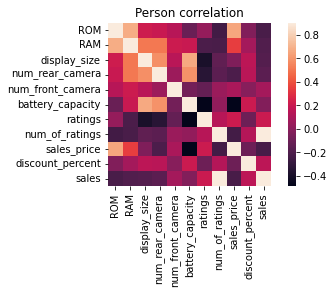

In [7]:
plt.figure(figsize = (6,3))
sns.heatmap(mobile.corr(), vmax = 0.9, square = True)
plt.title('Person correlation')
plt.show()

In [8]:
mobile.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [9]:

df = mobile.copy()
df = pd.get_dummies(df, drop_first= True)
df.head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS,screen_size_Medium,screen_size_Small,screen_size_Very Large,screen_size_Very Small
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,...,0,0,0,0,0,0,0,1,0,0
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,...,0,0,0,0,0,1,1,0,0,0
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,...,0,0,0,0,0,0,1,0,0,0


In [10]:
X = df.drop('sales_price', axis = 1)
y = df['sales_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(344, 153)
(86, 153)
(344,)
(86,)


In [11]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.9294740298855411

In [12]:
rg = RidgeCV()
rg.fit(X_train, y_train)
rg.score(X_test, y_test)

0.9390125105961822

In [13]:
laa = LassoCV()
laa.fit(X_train, y_train)
laa.score(X_test, y_test)

0.6765638416585067

In [14]:
ML = ['LinearRegression', 'LassoCV', 'RidgeCV']
clss = [LinearRegression(), LassoCV(), RidgeCV()]
result = []

for clf in clss:
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    result.append(acc)

result_df = pd.DataFrame(result , index = ML)
result_df.columns  = ['Accuraccy']
result_df.sort_values(by = 'Accuraccy', ascending = False)

,Accuraccy
RidgeCV,0.939013
LinearRegression,0.929474
LassoCV,0.676564


In [15]:
y_pred = rg.predict(X_test)
print(y_pred)

[13372.12766848 14778.67425595 44091.3168357   6830.26863152
 59347.38759981 22243.1494575  32874.53013311 12808.98224793
 12815.85106203  1356.45905792 47444.71531372 13558.95183991
 33235.99332919 13930.01297352 46859.14434733 11000.68366345
 14705.488926   24510.80540659 13926.27670391 25336.79449572
 13549.81926201  8121.07773062 13736.6404329  59340.5187857
 69337.61577653 20022.5561198  18335.71796515 20964.0040056
  9099.76109551 62527.93567008 29765.04100725 32379.92115056
 23511.91328281 36503.37160621 33778.23045512 20808.39330837
 16016.36214256 11576.1440578  32845.84012107 10693.06399212
 17503.30140467 11689.19659879 35193.14865402 17512.84930656
 47198.52009555 25548.16062321 11385.79890843 11283.90378691
 14105.93682253 15482.22360169 93796.31299512 12481.51029148
 69532.74412818 10715.51869346 24243.09194186  8942.95406096
 11015.98539892 12669.84661166 20529.59467909 12623.51440034
 20053.98842786  6634.19855006 14388.52104783  8831.84270752
 26910.34705591 10211.3686

In [16]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))
print('R Squared : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  2106.37
Mean Squared Error :  23333967.09
Root Mean Squared Error :  45.89520672139957
R Squared :  0.9390125105961822


C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


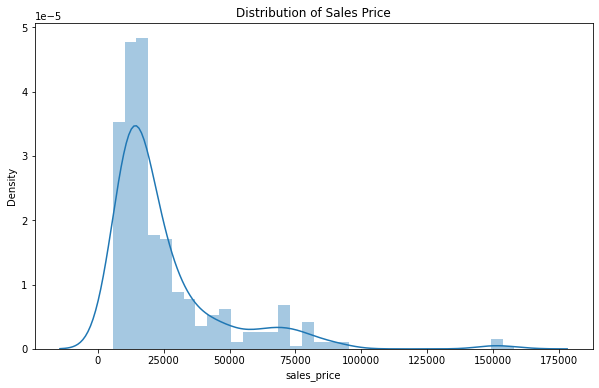

In [22]:
plt.figure(figsize= (10, 6))
sns.distplot(df['sales_price'])
plt.title("Distribution of Sales Price")
plt.show()

Text(0.5, 0, 'scale_price')

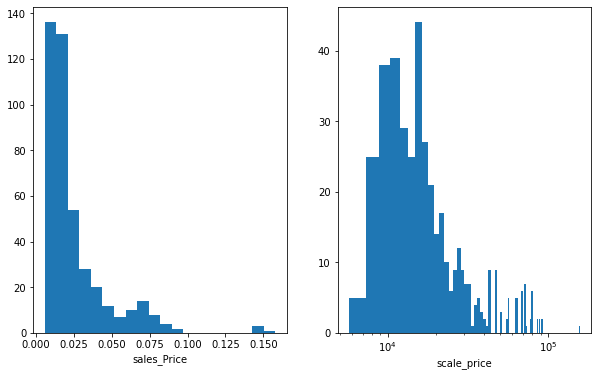

In [40]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.hist(df['sales_price'] * 1e-6, 20);
plt.xlabel("sales_Price")

plt.subplot(1,2,2)
plt.hist(mobile['sales_price'], bins = 100)
plt.xscale('log')
plt.xlabel("scale_price")

In [19]:
#defining feature
coef = pd.Series(rg.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

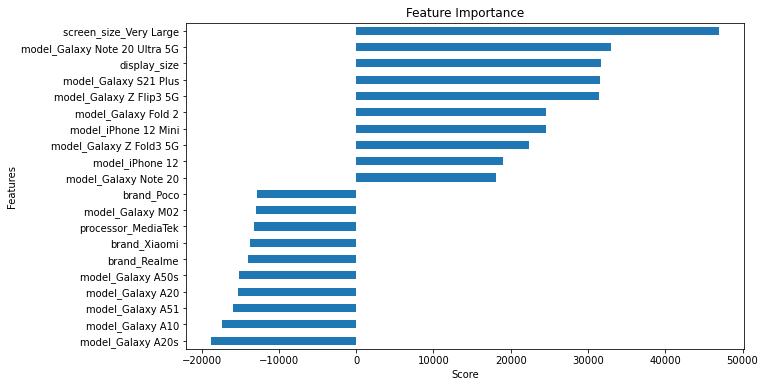

In [20]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


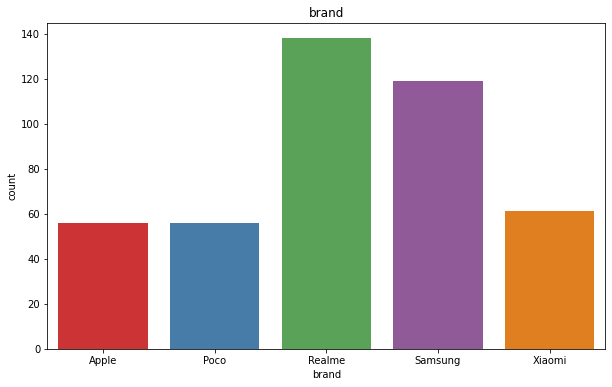

In [51]:
#visualize brand
plt.figure(figsize=(10,6))
sns.countplot(mobile['brand'], palette='Set1')
plt.title('brand')
plt.show()

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


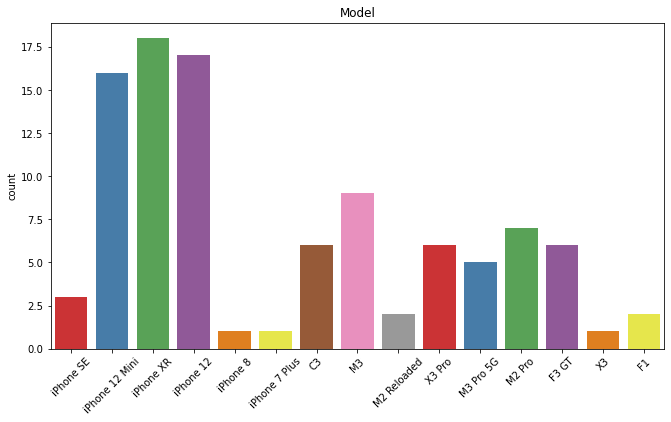

In [61]:
#visualize 100 row data of model
plt.figure(figsize = (11,6))
chart = sns.countplot(mobile['model'][0:100].values, palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Model")
plt.show()

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


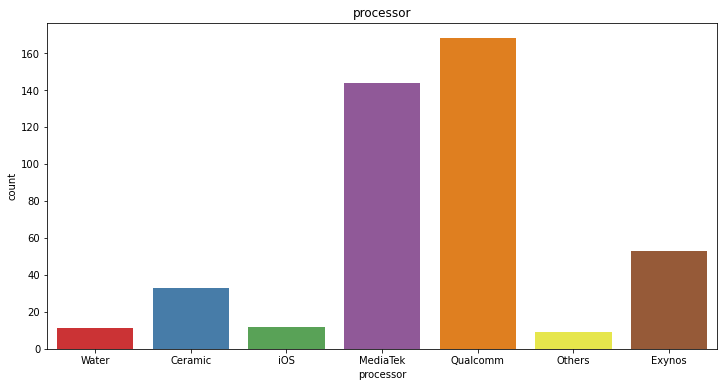

In [64]:
plt.figure(figsize= (12,6))
sns.countplot(mobile['processor'], palette = "Set1")
plt.title("processor")
plt.show()

C:\Users\Prasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


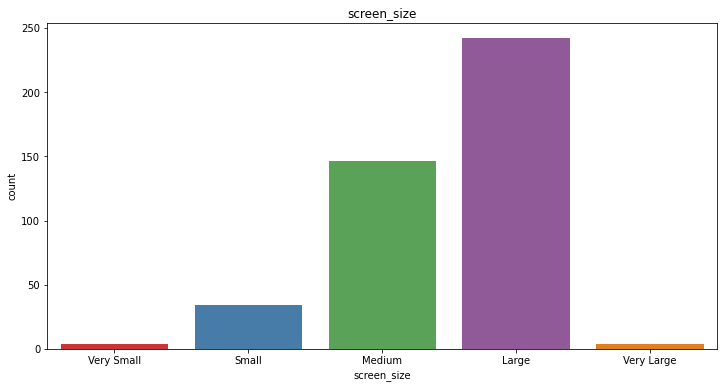

In [65]:
plt.figure(figsize= (12,6))
sns.countplot(mobile['screen_size'], palette = "Set1")
plt.title("screen_size")
plt.show()

In [83]:
brand_color = mobile.groupby(['brand', 'base_color']).size().reset_index(name = "Count")
brand_color

,brand,base_color,Count
0,Apple,Black,12
1,Apple,Blue,8
2,Apple,Gold,1
3,Apple,Green,6
4,Apple,Others,4
5,Apple,Purple,4
6,Apple,Red,7
7,Apple,White,11
8,Apple,Yellow,3
9,Poco,Black,17


In [82]:
brand_color = mobile.groupby(['brand', 'base_color']).size()
brand_color

brand    base_color
Apple    Black         12
         Blue           8
         Gold           1
         Green          6
         Others         4
         Purple         4
         Red            7
         White         11
         Yellow         3
Poco     Black         17
         Blue          18
         Bronze         2
         Gray           3
         Green          2
         Others         3
         Red            3
         Silver         3
         Yellow         5
Realme   Black         26
         Blue          43
         Gray           9
         Green          5
         Others         9
         Purple         1
         Red            2
         Silver        24
         White         16
         Yellow         3
Samsung  Black         38
         Blue          33
         Bronze         3
         Gold           2
         Gray           7
         Green         10
         Others         9
         Red            4
         Silver         3
         White    

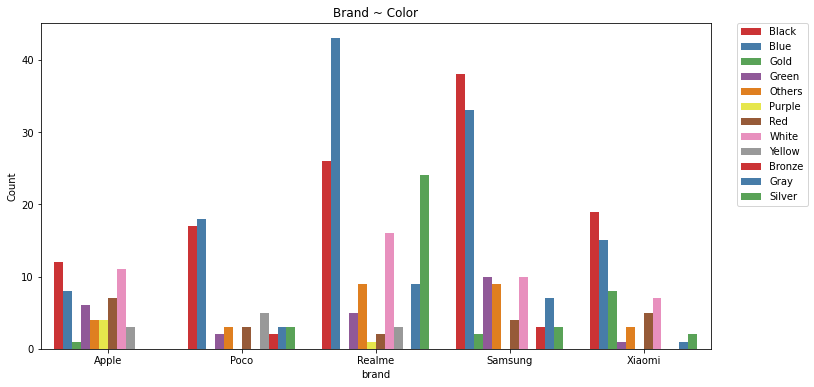

In [84]:
#viusalize brand ~ color
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'base_color', data = brand_color, palette = 'Set1')
plt.title("Brand ~ Color")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

In [85]:
brand_processor = mobile.groupby(['brand', 'processor']).size().reset_index(name = "count")
brand_processor

,brand,processor,count
0,Apple,Ceramic,33
1,Apple,Water,11
2,Apple,iOS,12
3,Poco,MediaTek,23
4,Poco,Qualcomm,33
5,Realme,MediaTek,91
6,Realme,Others,6
7,Realme,Qualcomm,41
8,Samsung,Exynos,53
9,Samsung,MediaTek,25


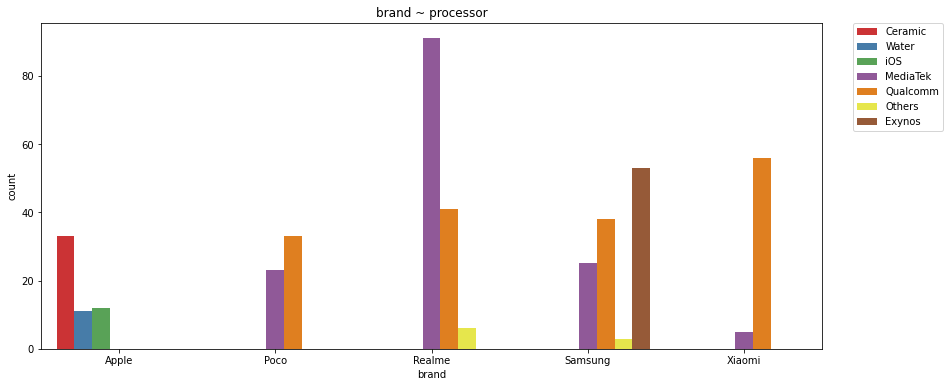

In [90]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'brand', y = "count", hue ="processor", data = brand_processor, palette = "Set1")
plt.title("brand ~ processor")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

In [94]:
brand_size = mobile.groupby(['brand', 'screen_size']).size().reset_index(name = 'Count')
brand_size

,brand,screen_size,Count
0,Apple,Medium,35
1,Apple,Small,17
2,Apple,Very Small,4
3,Poco,Large,54
4,Poco,Medium,2
5,Realme,Large,82
6,Realme,Medium,56
7,Samsung,Large,82
8,Samsung,Medium,26
9,Samsung,Small,7


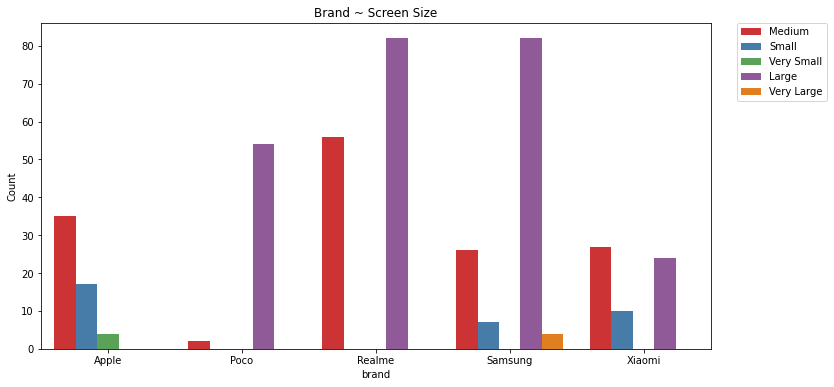

In [96]:
#viusalize brand ~ processor
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'screen_size', data = brand_size, palette = 'Set1')
plt.title("Brand ~ Screen Size")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

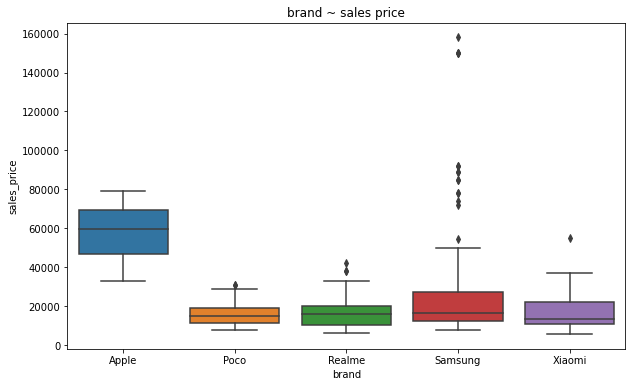

In [97]:
plt.figure(figsize =( 10,6))
sns.boxplot(x = "brand", y ="sales_price", data = mobile)
plt.title("brand ~ sales price")
plt.show()

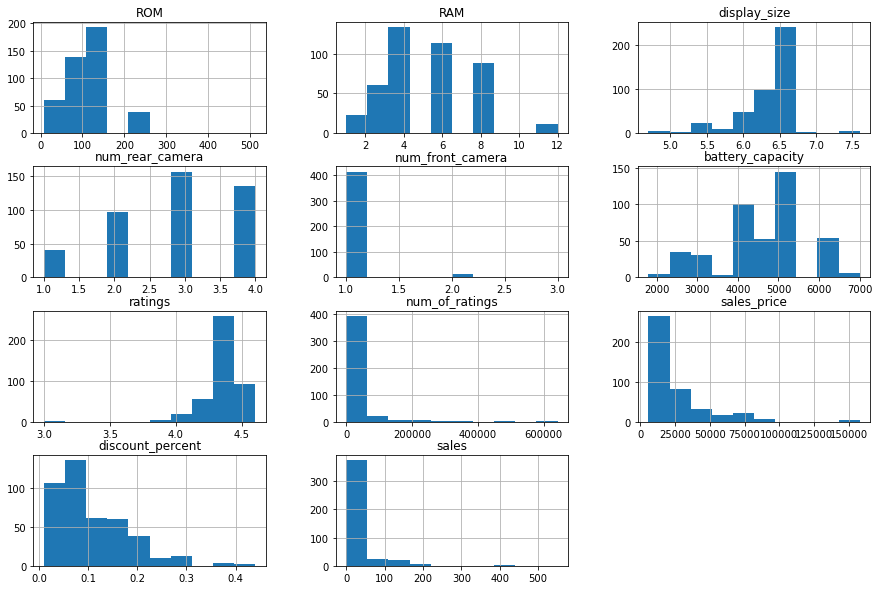

In [102]:
mobile.hist(figsize = (15,10))
plt.show()